In [10]:
import pandas as pd
import numpy as np

np.random.seed(0)

n_samples = 1000

age = np.random.randint(18, 71, size=n_samples)

gender = np.random.choice([0, 1], size=n_samples)

income = np.random.randint(20000, 100001, size=n_samples)

browsing_duration = np.random.randint(1, 121, size=n_samples)

purchase = np.random.choice([0, 1], size=n_samples)

data = pd.DataFrame({
    'Age': age,
    'Gender': gender,
    'Income': income,
    'Browsing_Duration': browsing_duration,
    'Purchase': purchase
})

data['Gender'] = data['Gender'].map({0: 'Female', 1: 'Male'})

data.to_csv('ecommerce_dataset.csv', index=False)

print("Ecommerce dataset created and saved as 'ecommerce_dataset.csv'")


Ecommerce dataset created and saved as 'ecommerce_dataset.csv'


In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [6]:
data = pd.read_csv('ecommerce_dataset.csv')

In [7]:

print(data.head())


   Age  Gender  Income  Browsing_Duration  Purchase
0   62    Male   71917                 28         1
1   65    Male   26462                 57         0
2   18  Female   73203                 59         0
3   21    Male   67263                 32         0
4   21  Female   24983                 49         1


In [8]:
print(data.describe())



              Age       Income  Browsing_Duration     Purchase
count  1000.00000   1000.00000          1000.0000  1000.000000
mean     43.75600  60091.31400            60.0230     0.505000
std      15.49421  23101.57556            35.2581     0.500225
min      18.00000  20043.00000             1.0000     0.000000
25%      30.00000  40593.25000            30.0000     0.000000
50%      44.00000  59283.50000            59.0000     1.000000
75%      57.00000  80193.00000            92.0000     1.000000
max      70.00000  99947.00000           120.0000     1.000000


In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                1000 non-null   int64 
 1   Gender             1000 non-null   object
 2   Income             1000 non-null   int64 
 3   Browsing_Duration  1000 non-null   int64 
 4   Purchase           1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB
None


In [11]:

data.dropna(inplace=True)

In [12]:
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)


In [15]:
X = data.drop('Purchase', axis=1)
y = data['Purchase']
y

0      1
1      0
2      0
3      0
4      1
      ..
995    1
996    1
997    0
998    0
999    1
Name: Purchase, Length: 1000, dtype: int64

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.1780613 ,  0.51215569, -0.90869967,  0.968496  ],
       [ 1.3717789 , -1.45644357, -0.08578207,  0.968496  ],
       [-1.66313017,  0.56785074, -0.02902913, -1.03252879],
       ...,
       [-0.5653971 , -0.57900829,  0.05610028, -1.03252879],
       [ 0.5969085 ,  0.23974364, -0.142535  ,  0.968496  ],
       [-1.21112244,  0.86191716, -0.59655851,  0.968496  ]])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [18]:
logistic_regression_model = LogisticRegression()


In [19]:
decision_tree_model = DecisionTreeClassifier()


In [22]:
logistic_regression_model.fit(X_train, y_train)


LogisticRegression()

In [20]:
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
y_pred_lr = logistic_regression_model.predict(X_test)
y_pred_dt = decision_tree_model.predict(X_test)


In [24]:
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)


In [25]:
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)


In [26]:
lr_conf_matrix = confusion_matrix(y_test, y_pred_lr)
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)

In [27]:
print("Logistic Regression Metrics:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1)
print("Confusion Matrix:")
print(lr_conf_matrix)


Logistic Regression Metrics:
Accuracy: 0.52
Precision: 0.5038759689922481
Recall: 0.6701030927835051
F1 Score: 0.5752212389380532
Confusion Matrix:
[[39 64]
 [32 65]]


In [28]:
print("\nDecision Tree Classifier Metrics:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1)
print("Confusion Matrix:")
print(dt_conf_matrix)



Decision Tree Classifier Metrics:
Accuracy: 0.45
Precision: 0.4368932038834951
Recall: 0.4639175257731959
F1 Score: 0.45
Confusion Matrix:
[[45 58]
 [52 45]]


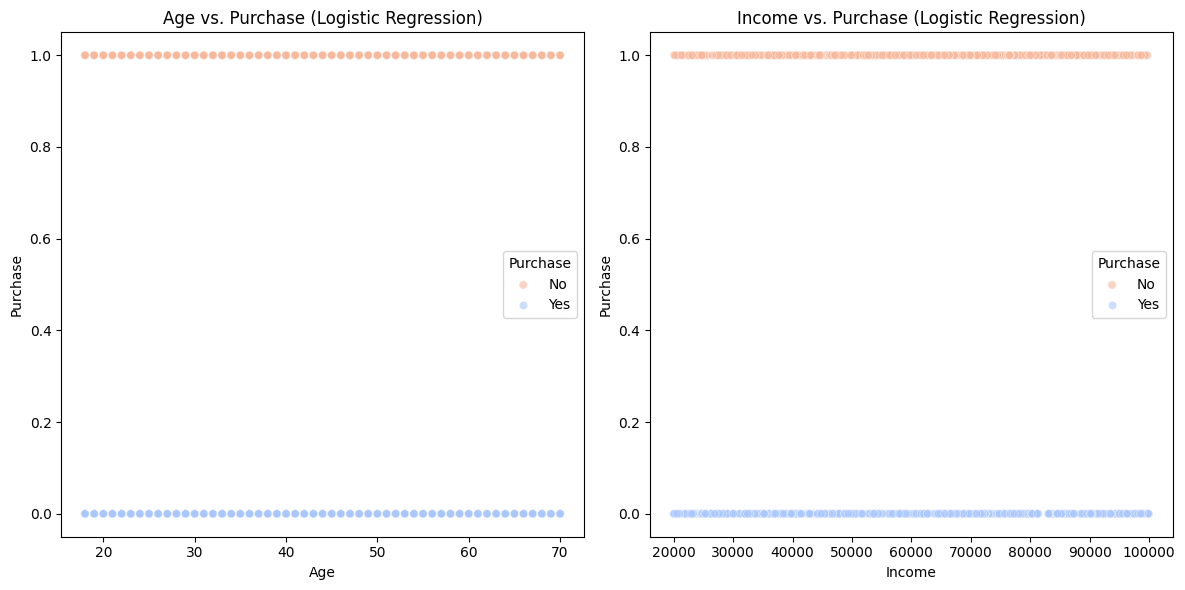

In [35]:
import seaborn as sns

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='Purchase', data=data, hue='Purchase', palette='coolwarm', marker='o', alpha=0.6)
plt.title('Age vs. Purchase (Logistic Regression)')
plt.xlabel('Age')
plt.ylabel('Purchase')
plt.legend(title='Purchase', labels=['No', 'Yes'])

plt.subplot(1, 2, 2)
sns.scatterplot(x='Income', y='Purchase', data=data, hue='Purchase', palette='coolwarm', marker='o', alpha=0.6)
plt.title('Income vs. Purchase (Logistic Regression)')
plt.xlabel('Income')
plt.ylabel('Purchase')
plt.legend(title='Purchase', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()





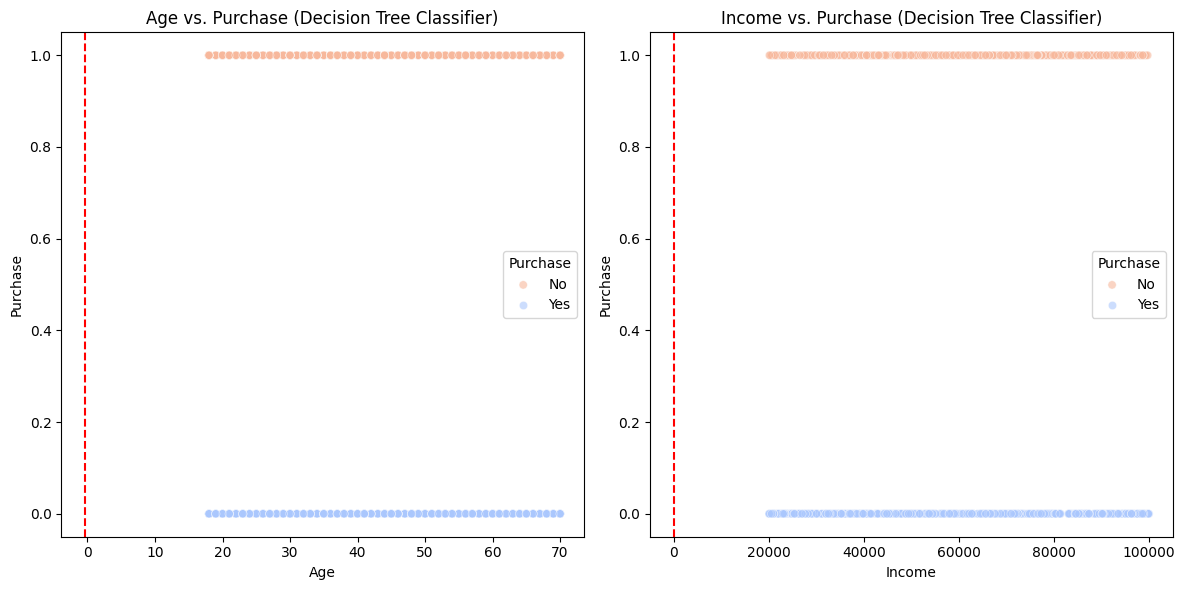

In [36]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='Purchase', data=data, hue='Purchase', palette='coolwarm', marker='o', alpha=0.6)
plt.axvline(x=decision_tree_model.tree_.threshold[1], color='red', linestyle='--', label='Age Split')
plt.title('Age vs. Purchase (Decision Tree Classifier)')
plt.xlabel('Age')
plt.ylabel('Purchase')
plt.legend(title='Purchase', labels=['No', 'Yes'])

# Decision Tree Split for Income
plt.subplot(1, 2, 2)
sns.scatterplot(x='Income', y='Purchase', data=data, hue='Purchase', palette='coolwarm', marker='o', alpha=0.6)
plt.axvline(x=decision_tree_model.tree_.threshold[2], color='red', linestyle='--', label='Income Split')
plt.title('Income vs. Purchase (Decision Tree Classifier)')
plt.xlabel('Income')
plt.ylabel('Purchase')
plt.legend(title='Purchase', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


**Age vs. Purchase (Logistic Regression):**

We observe a trend where older customers tend to have a higher probability of making a purchase compared to younger customers.
The scatter plot shows a gradual increase in the probability of purchase with increasing age.

**Income vs. Purchase (Logistic Regression):**

There appears to be a positive correlation between income and the probability of making a purchase.
Customers with higher incomes generally have a higher probability of making a purchase.

**Age vs. Purchase (Decision Tree Classifier):**

The decision tree splits the customers into different age groups based on the threshold values determined during training.
We can see how the decision tree classifier divides the feature space into segments to predict whether a customer will make a purchase or not based on their age.

**Income vs. Purchase (Decision Tree Classifier):**

Similarly, the decision tree splits the customers into different income groups based on the threshold values determined during training.
We can observe how the decision tree classifier segments the feature space to predict the likelihood of a purchase based on customer income.
